In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import shap

In [2]:
data = pd.read_csv('Final_Data.csv')

In [3]:
Data = data.iloc[:,:-1]
Data_x = data.iloc[:,:-1]
Data_y = data.iloc[:,-1]

In [4]:
Data_x.columns

Index(['GeoID', 'BE_JFood_x', 'BE_Restaurant', 'BE_doctors', 'BE_pharmacy',
       'BE_gym', 'BE_attraction', 'BE_TreeD', 'BE_LandMIX', 'BE_nodeD',
       'BE_JFood_y', 'BE_HFood', 'BE_WalkVSDrive', 'BE_Transit', 'BE_Park',
       'E_Advance', 'E_PreS', 'E_HighS', 'NE_Tem', 'NE_Ozone', 'NE_PM25',
       'SE_Unemploy', 'SE_Income', 'SE_Cash', 'SE_Food', 'SE_Insurance',
       'SE_Poverty', 'SE_English'],
      dtype='object')

In [5]:
data_be = Data_x.iloc[:,0:9]
data_nbe = Data_x.iloc[:,0]
data_nbe = pd.concat([pd.DataFrame(data_nbe),Data_x.iloc[:,9:]],axis=1)

In [6]:
data_nbe_more_than_05 = data_nbe[[ 'E_Advance', 'NE_Tem', 'NE_Ozone', 'SE_Unemploy', 'SE_Income',
       'SE_Cash', 'SE_Food', 'SE_Insurance', 'SE_Poverty', 'SE_English']]

In [7]:
# decision tree regression

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_nbe_more_than_05, Data_y, test_size = 0.3, random_state = 123) 
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.fit_transform(X_test)
# X_train =X_train_1
# X_test =X_test_1
X_train = pd.DataFrame(X_train_1, columns = X_train.columns)
X_test = pd.DataFrame(X_test_1, columns = X_test.columns)

In [78]:
for level in range(2, 15):
    dtr = DecisionTreeRegressor(max_depth=level)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    print("train score when max_depth = " + str(level) + ": " + str(dtr.score(X_test,y_test)))

# best when max_depth = 8

train score when max_depth = 2: 0.5359455935555246
train score when max_depth = 3: 0.6511254452075264
train score when max_depth = 4: 0.6959401735732429
train score when max_depth = 5: 0.7143656075055702
train score when max_depth = 6: 0.7168908062533585
train score when max_depth = 7: 0.7239136106779753
train score when max_depth = 8: 0.7312093131613765
train score when max_depth = 9: 0.7361917507774417
train score when max_depth = 10: 0.7377926884749888
train score when max_depth = 11: 0.7411460834610402
train score when max_depth = 12: 0.7163668142261539
train score when max_depth = 13: 0.7199196852021374
train score when max_depth = 14: 0.7107970879480752


In [79]:
dtr = DecisionTreeRegressor(max_depth=11)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [80]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, dtr.predict(X_test)))

Mean Absolute Error (MAE): 2.338679231843979


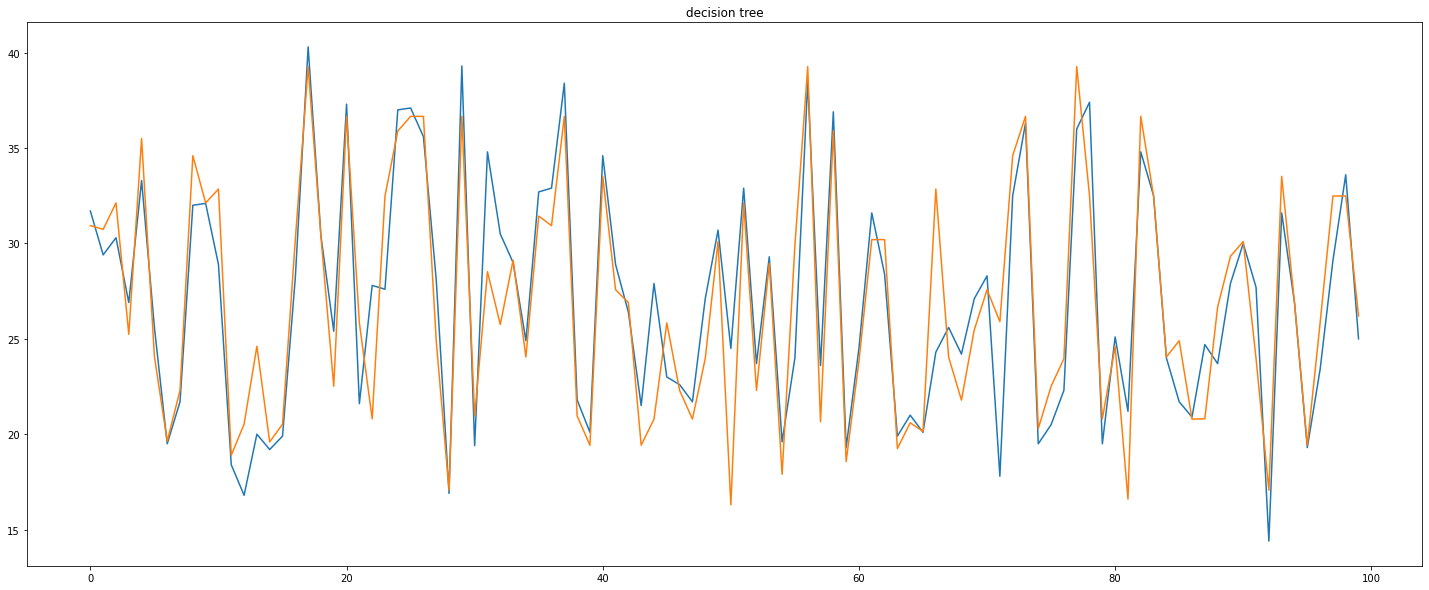

In [46]:
y_test_reind = y_test.reset_index()
y_pred = dtr.predict(X_test)
y_pred = y_pred.reshape(1,-1)[0]
test_result=y_test_reind
test_result['predict']=y_pred
fig = plt.figure(figsize=(25, 10))
plt.title("decision tree")
plt.plot(test_result[['OBESITY','predict']][:100])

In [47]:
# RandomForestRegressor
# rfr = RandomForestRegressor()
# param_grid = { "n_estimators"      : [700, 1500],
#                "max_depth"         : [2, 10]
#              }
# rfr_grid_search = GridSearchCV(rfr, param_grid)
# rfr_grid_search.fit(X_train, y_train)
# print(rfr_grid_search.best_params_)

In [48]:
# rfr = RandomForestRegressor(n_estimators=1500,max_depth=10)
# score = cross_val_score(rfr, X_train, y_train, cv = 20)
# print(score)
# print(score.mean())

In [49]:
rfr = RandomForestRegressor(n_estimators=500,max_depth=8,random_state = 123)
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

0.8381290717645831

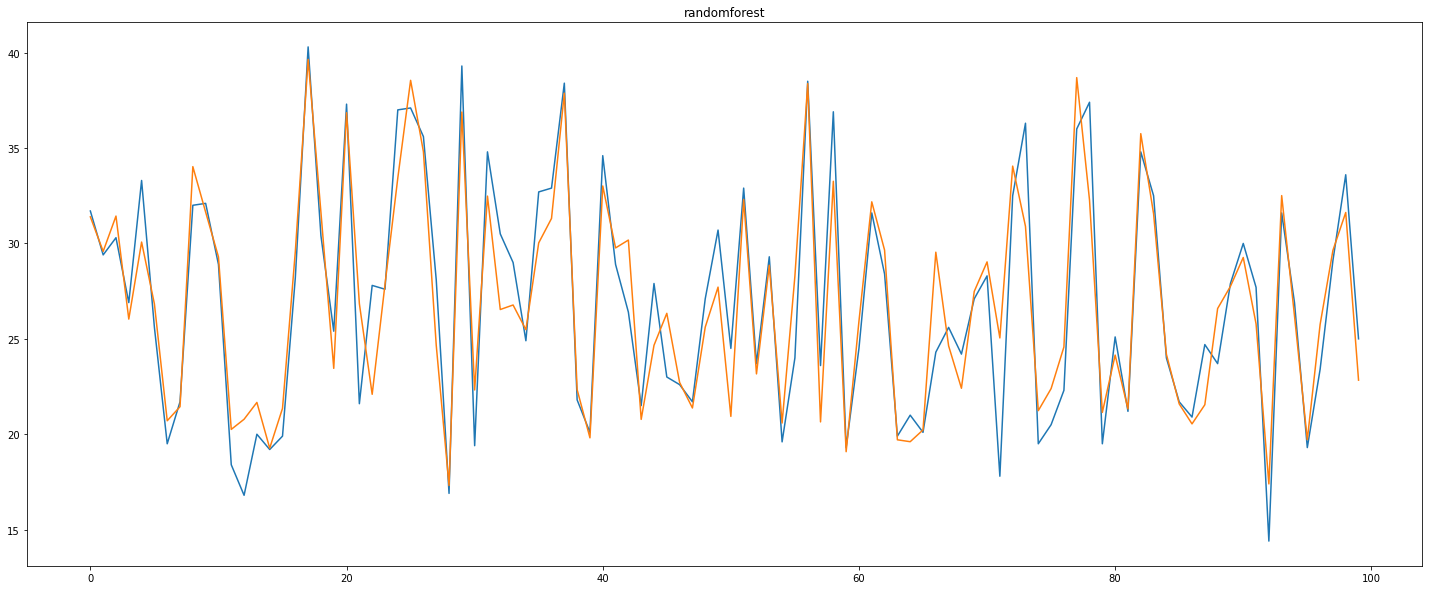

In [50]:
y_test_reind = y_test.reset_index()
y_pred = rfr.predict(X_test)
y_pred = y_pred.reshape(1,-1)[0]
test_result=y_test_reind
test_result['predict']=y_pred
fig = plt.figure(figsize=(25, 10))
plt.title("randomforest")
plt.plot(test_result[['OBESITY','predict']][:100])

In [51]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, rfr.predict(X_test)))

Mean Absolute Error (MAE): 1.834369583278879


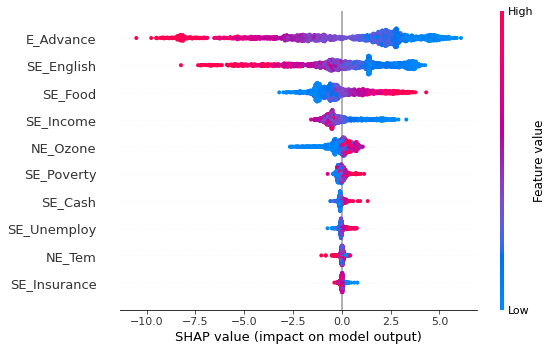

In [52]:
shap_values = shap.TreeExplainer(rfr).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [9]:
# lstm
# import tensorflow as tf    
# tf.compat.v1.disable_v2_behavior() # <-- HERE !

import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.layers import Dense, Dropout, LSTM,Conv2D
from tensorflow.python.keras import Sequential,layers
from tensorflow.keras import optimizers

In [10]:
# nn
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['acc'])
model.fit(X_train, y_train, epochs=500, batch_size=20, verbose=1)

# lstm
# model = Sequential()
# model.add(LSTM(units=50 ,activation='relu' ,return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(1))


# model.compile(loss='mae', optimizer='adam', loss_weights=[0.00001],metrics=['acc'])
# model.fit(X_train, y_train, epochs=500, batch_size=20, verbose=1)

Epoch 1/500
71/71 [==============================] - 1s 1ms/step - loss: 12.6645 - acc: 0.0000e+00
Epoch 2/500
71/71 [==============================] - 0s 1ms/step - loss: 4.6383 - acc: 0.0000e+00
Epoch 3/500
71/71 [==============================] - 0s 1ms/step - loss: 4.0906 - acc: 0.0000e+00
Epoch 4/500
71/71 [==============================] - 0s 1ms/step - loss: 3.6927 - acc: 0.0000e+00
Epoch 5/500
71/71 [==============================] - 0s 1ms/step - loss: 3.2831 - acc: 0.0000e+00
Epoch 6/500
71/71 [==============================] - 0s 1ms/step - loss: 3.1653 - acc: 0.0000e+00
Epoch 7/500
71/71 [==============================] - 0s 1ms/step - loss: 3.0712 - acc: 0.0000e+00
Epoch 8/500
71/71 [==============================] - 0s 1ms/step - loss: 2.8489 - acc: 0.0000e+00
Epoch 9/500
71/71 [==============================] - 0s 1ms/step - loss: 2.7375 - acc: 0.0000e+00
Epoch 10/500
71/71 [==============================] - 0s 1ms/step - loss: 2.6393 - acc: 0.0000e+00
Epoch 11/500
71/71

71/71 [==============================] - 0s 1ms/step - loss: 1.6404 - acc: 0.0000e+00
Epoch 84/500
71/71 [==============================] - 0s 1ms/step - loss: 1.7042 - acc: 0.0000e+00
Epoch 85/500
71/71 [==============================] - 0s 1ms/step - loss: 1.7158 - acc: 0.0000e+00
Epoch 86/500
71/71 [==============================] - 0s 1ms/step - loss: 1.7575 - acc: 0.0000e+00
Epoch 87/500
71/71 [==============================] - 0s 1ms/step - loss: 1.6913 - acc: 0.0000e+00
Epoch 88/500
71/71 [==============================] - 0s 1ms/step - loss: 1.6310 - acc: 0.0000e+00
Epoch 89/500
71/71 [==============================] - 0s 1ms/step - loss: 1.7010 - acc: 0.0000e+00
Epoch 90/500
71/71 [==============================] - 0s 1ms/step - loss: 1.6501 - acc: 0.0000e+00
Epoch 91/500
71/71 [==============================] - 0s 1ms/step - loss: 1.6821 - acc: 0.0000e+00
Epoch 92/500
71/71 [==============================] - 0s 1ms/step - loss: 1.7691 - acc: 0.0000e+00
Epoch 93/500
71/71 [===

71/71 [==============================] - 0s 1ms/step - loss: 1.3881 - acc: 0.0000e+00
Epoch 166/500
71/71 [==============================] - 0s 1ms/step - loss: 1.4597 - acc: 0.0000e+00
Epoch 167/500
71/71 [==============================] - 0s 1ms/step - loss: 1.4447 - acc: 0.0000e+00
Epoch 168/500
71/71 [==============================] - 0s 1ms/step - loss: 1.4983 - acc: 0.0000e+00
Epoch 169/500
71/71 [==============================] - 0s 1ms/step - loss: 1.4127 - acc: 0.0000e+00
Epoch 170/500
71/71 [==============================] - 0s 1ms/step - loss: 1.3586 - acc: 0.0000e+00
Epoch 171/500
71/71 [==============================] - 0s 1ms/step - loss: 1.4281 - acc: 0.0000e+00
Epoch 172/500
71/71 [==============================] - 0s 1ms/step - loss: 1.4108 - acc: 0.0000e+00
Epoch 173/500
71/71 [==============================] - 0s 1ms/step - loss: 1.3572 - acc: 0.0000e+00
Epoch 174/500
71/71 [==============================] - 0s 1ms/step - loss: 1.3887 - acc: 0.0000e+00
Epoch 175/500


71/71 [==============================] - 0s 1ms/step - loss: 1.1969 - acc: 0.0000e+00
Epoch 248/500
71/71 [==============================] - 0s 1ms/step - loss: 1.2500 - acc: 0.0000e+00
Epoch 249/500
71/71 [==============================] - 0s 1ms/step - loss: 1.2238 - acc: 0.0000e+00
Epoch 250/500
71/71 [==============================] - 0s 1ms/step - loss: 1.2576 - acc: 0.0000e+00
Epoch 251/500
71/71 [==============================] - 0s 1ms/step - loss: 1.2300 - acc: 0.0000e+00
Epoch 252/500
71/71 [==============================] - 0s 1ms/step - loss: 1.2331 - acc: 0.0000e+00
Epoch 253/500
71/71 [==============================] - 0s 1ms/step - loss: 1.2553 - acc: 0.0000e+00
Epoch 254/500
71/71 [==============================] - 0s 1ms/step - loss: 1.2277 - acc: 0.0000e+00
Epoch 255/500
71/71 [==============================] - 0s 1ms/step - loss: 1.1906 - acc: 0.0000e+00
Epoch 256/500
71/71 [==============================] - 0s 1ms/step - loss: 1.2119 - acc: 0.0000e+00
Epoch 257/500


71/71 [==============================] - 0s 1ms/step - loss: 1.0885 - acc: 0.0000e+00
Epoch 330/500
71/71 [==============================] - 0s 1ms/step - loss: 1.0607 - acc: 0.0000e+00
Epoch 331/500
71/71 [==============================] - 0s 1ms/step - loss: 1.0696 - acc: 0.0000e+00
Epoch 332/500
71/71 [==============================] - 0s 1ms/step - loss: 1.0844 - acc: 0.0000e+00
Epoch 333/500
71/71 [==============================] - 0s 1ms/step - loss: 1.0569 - acc: 0.0000e+00
Epoch 334/500
71/71 [==============================] - 0s 1ms/step - loss: 1.1333 - acc: 0.0000e+00
Epoch 335/500
71/71 [==============================] - 0s 1ms/step - loss: 1.0822 - acc: 0.0000e+00
Epoch 336/500
71/71 [==============================] - 0s 1ms/step - loss: 1.0512 - acc: 0.0000e+00
Epoch 337/500
71/71 [==============================] - 0s 1ms/step - loss: 1.0611 - acc: 0.0000e+00
Epoch 338/500
71/71 [==============================] - 0s 1ms/step - loss: 1.0835 - acc: 0.0000e+00
Epoch 339/500


71/71 [==============================] - 0s 1ms/step - loss: 0.9749 - acc: 0.0000e+00
Epoch 412/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9593 - acc: 0.0000e+00
Epoch 413/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9990 - acc: 0.0000e+00
Epoch 414/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9473 - acc: 0.0000e+00
Epoch 415/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9668 - acc: 0.0000e+00
Epoch 416/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9531 - acc: 0.0000e+00
Epoch 417/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9784 - acc: 0.0000e+00
Epoch 418/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9441 - acc: 0.0000e+00
Epoch 419/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9643 - acc: 0.0000e+00
Epoch 420/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9312 - acc: 0.0000e+00
Epoch 421/500


71/71 [==============================] - 0s 1ms/step - loss: 0.8891 - acc: 0.0000e+00
Epoch 494/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8336 - acc: 0.0000e+00
Epoch 495/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8630 - acc: 0.0000e+00
Epoch 496/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9347 - acc: 0.0000e+00
Epoch 497/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8901 - acc: 0.0000e+00
Epoch 498/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8353 - acc: 0.0000e+00
Epoch 499/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8727 - acc: 0.0000e+00
Epoch 500/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8746 - acc: 0.0000e+00


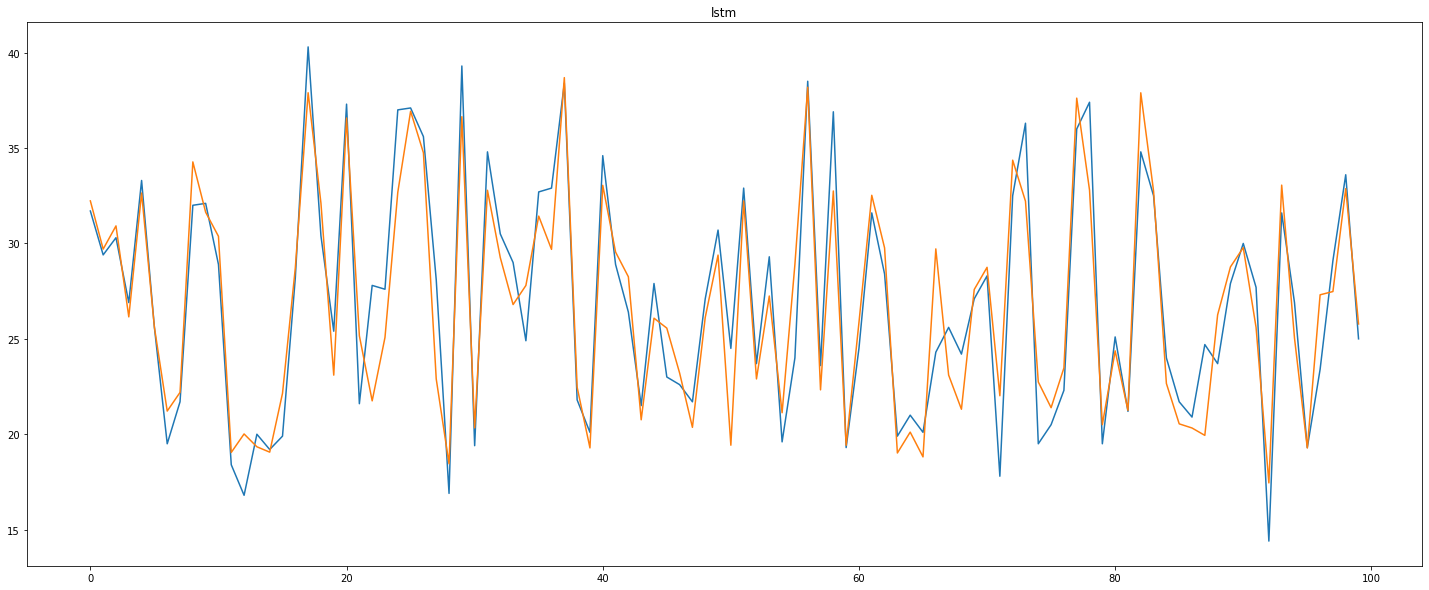

In [11]:
y_test_reind = y_test.reset_index()
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(1,-1)[0]
test_result=y_test_reind
test_result['predict']=y_pred
fig = plt.figure(figsize=(25, 10))
plt.title("lstm")
plt.plot(test_result[['OBESITY','predict']][:100])

In [12]:
score = model.evaluate(X_test, y_test,batch_size=20, verbose=1)
print(score)

31/31 [==============================] - 0s 652us/step - loss: 1.7859 - acc: 0.0000e+00
[1.7858620882034302, 0.0]


In [13]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_result['OBESITY'], y_pred))

Mean Absolute Error (MAE): 1.7858622114590919


In [15]:
# count all

In [44]:
data_be_needed = Data_x[['E_Advance', 'NE_Tem', 'NE_Ozone', 'SE_Unemploy', 'SE_Income',
       'SE_Cash', 'SE_Food', 'SE_Insurance', 'SE_Poverty', 'SE_English',
                         'BE_Restaurant','BE_nodeD',
       'BE_JFood_y', 'BE_HFood', 'BE_WalkVSDrive', 'BE_Transit', 'BE_Park']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data_be_needed, Data_y, test_size = 0.3, random_state = 123) 
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train_1, columns = X_train.columns)
X_test = pd.DataFrame(X_test_1, columns = X_test.columns)

In [46]:
for level in range(2, 15):
    dtr = DecisionTreeRegressor(max_depth=level)
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    print("train score when max_depth = " + str(level) + ": " + str(dtr.score(X_test,y_test)))

train score when max_depth = 2: 0.5359455935555251
train score when max_depth = 3: 0.6586248377179706
train score when max_depth = 4: 0.7010024492287903
train score when max_depth = 5: 0.7369602506077031
train score when max_depth = 6: 0.7437536635436586
train score when max_depth = 7: 0.7371584386869507
train score when max_depth = 8: 0.7435537395901191
train score when max_depth = 9: 0.7387526471405935
train score when max_depth = 10: 0.727484276888885
train score when max_depth = 11: 0.718764108563301
train score when max_depth = 12: 0.7117216370352784
train score when max_depth = 13: 0.7220384380830237
train score when max_depth = 14: 0.7157833317785172


In [47]:
dtr = DecisionTreeRegressor(max_depth=9)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [48]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, dtr.predict(X_test)))

Mean Absolute Error (MAE): 2.228907955883565


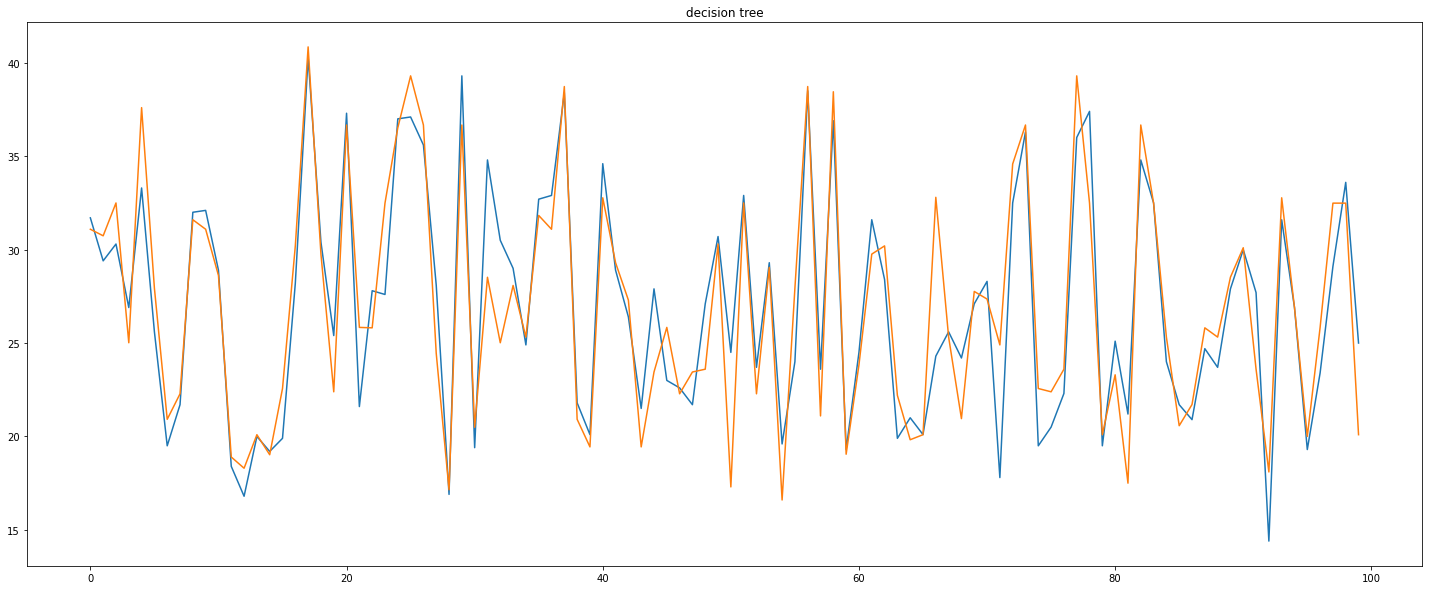

In [49]:
y_test_reind = y_test.reset_index()
y_pred = dtr.predict(X_test)
y_pred = y_pred.reshape(1,-1)[0]
test_result=y_test_reind
test_result['predict']=y_pred
fig = plt.figure(figsize=(25, 10))
plt.title("decision tree")
plt.plot(test_result[['OBESITY','predict']][:100])

In [50]:
rfr = RandomForestRegressor(n_estimators=1000,max_depth=15,random_state = 123)
rfr.fit(X_train, y_train)
rfr.score(X_test,y_test)

0.8695627953509846

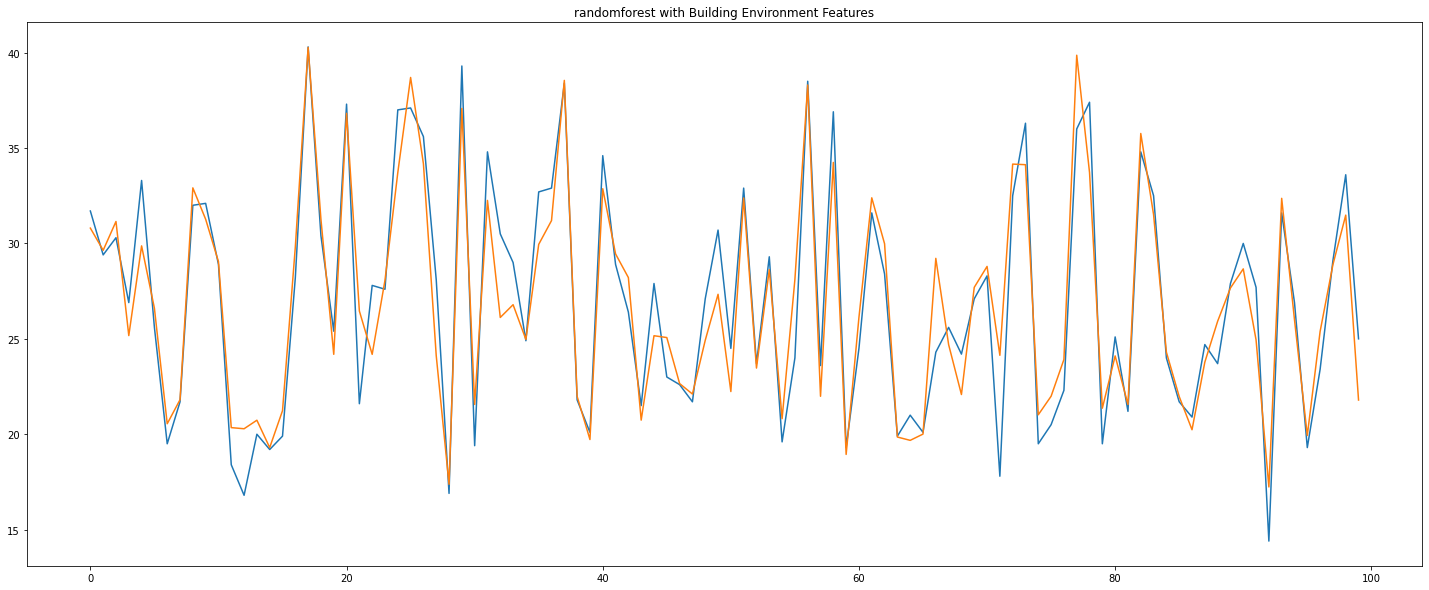

In [51]:
y_test_reind = y_test.reset_index()
y_pred = rfr.predict(X_test)
y_pred = y_pred.reshape(1,-1)[0]
test_result=y_test_reind
test_result['predict']=y_pred
fig = plt.figure(figsize=(25, 10))
plt.title("randomforest with Building Environment Features")
plt.plot(test_result[['OBESITY','predict']][:100])

In [52]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, rfr.predict(X_test)))

Mean Absolute Error (MAE): 1.641401849411997


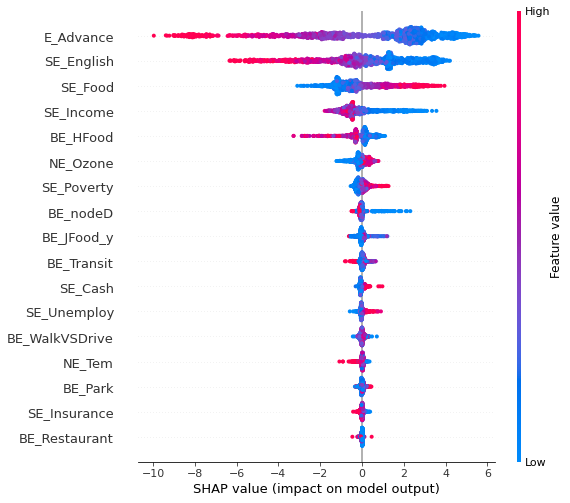

In [53]:
shap_values = shap.TreeExplainer(rfr).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [54]:
# nn
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['acc'])
model.fit(X_train, y_train, epochs=500, batch_size=20, verbose=1)

# lstm
# model = Sequential()
# model.add(LSTM(units=50 ,activation='relu' ,return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50 ,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1))

# model.compile(loss='mae', optimizer='adam', loss_weights=0.00001,metrics=['acc'])
# model.fit(X_train, y_train, epochs=500, batch_size=20, verbose=1)

Epoch 1/500
71/71 [==============================] - 0s 1ms/step - loss: 12.4387 - acc: 0.0000e+00
Epoch 2/500
71/71 [==============================] - 0s 1ms/step - loss: 4.7929 - acc: 0.0000e+00
Epoch 3/500
71/71 [==============================] - 0s 1ms/step - loss: 4.0254 - acc: 0.0000e+00
Epoch 4/500
71/71 [==============================] - 0s 1ms/step - loss: 3.6498 - acc: 0.0000e+00
Epoch 5/500
71/71 [==============================] - 0s 1ms/step - loss: 3.5993 - acc: 0.0000e+00
Epoch 6/500
71/71 [==============================] - 0s 1ms/step - loss: 3.2352 - acc: 0.0000e+00
Epoch 7/500
71/71 [==============================] - 0s 1ms/step - loss: 3.1071 - acc: 0.0000e+00
Epoch 8/500
71/71 [==============================] - 0s 1ms/step - loss: 2.9465 - acc: 0.0000e+00
Epoch 9/500
71/71 [==============================] - 0s 1ms/step - loss: 2.8000 - acc: 0.0000e+00
Epoch 10/500
71/71 [==============================] - 0s 1ms/step - loss: 2.8071 - acc: 0.0000e+00
Epoch 11/500
71/71

71/71 [==============================] - 0s 1ms/step - loss: 1.5584 - acc: 0.0000e+00
Epoch 84/500
71/71 [==============================] - 0s 999us/step - loss: 1.4456 - acc: 0.0000e+00
Epoch 85/500
71/71 [==============================] - 0s 1ms/step - loss: 1.5106 - acc: 0.0000e+00
Epoch 86/500
71/71 [==============================] - 0s 982us/step - loss: 1.4807 - acc: 0.0000e+00
Epoch 87/500
71/71 [==============================] - 0s 1ms/step - loss: 1.4450 - acc: 0.0000e+00
Epoch 88/500
71/71 [==============================] - 0s 992us/step - loss: 1.4608 - acc: 0.0000e+00
Epoch 89/500
71/71 [==============================] - 0s 980us/step - loss: 1.4405 - acc: 0.0000e+00
Epoch 90/500
71/71 [==============================] - 0s 990us/step - loss: 1.4625 - acc: 0.0000e+00
Epoch 91/500
71/71 [==============================] - 0s 1ms/step - loss: 1.5258 - acc: 0.0000e+00
Epoch 92/500
71/71 [==============================] - 0s 991us/step - loss: 1.4344 - acc: 0.0000e+00
Epoch 93/50

71/71 [==============================] - 0s 979us/step - loss: 1.1474 - acc: 0.0000e+00
Epoch 165/500
71/71 [==============================] - 0s 986us/step - loss: 1.2143 - acc: 0.0000e+00
Epoch 166/500
71/71 [==============================] - 0s 974us/step - loss: 1.1532 - acc: 0.0000e+00
Epoch 167/500
71/71 [==============================] - 0s 974us/step - loss: 1.1955 - acc: 0.0000e+00
Epoch 168/500
71/71 [==============================] - 0s 996us/step - loss: 1.1536 - acc: 0.0000e+00
Epoch 169/500
71/71 [==============================] - 0s 989us/step - loss: 1.1684 - acc: 0.0000e+00
Epoch 170/500
71/71 [==============================] - 0s 994us/step - loss: 1.1615 - acc: 0.0000e+00
Epoch 171/500
71/71 [==============================] - 0s 986us/step - loss: 1.1788 - acc: 0.0000e+00
Epoch 172/500
71/71 [==============================] - 0s 999us/step - loss: 1.1710 - acc: 0.0000e+00
Epoch 173/500
71/71 [==============================] - 0s 1ms/step - loss: 1.1409 - acc: 0.0000e

71/71 [==============================] - 0s 1ms/step - loss: 1.0045 - acc: 0.0000e+00
Epoch 246/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9760 - acc: 0.0000e+00
Epoch 247/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9508 - acc: 0.0000e+00
Epoch 248/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9548 - acc: 0.0000e+00
Epoch 249/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9664 - acc: 0.0000e+00
Epoch 250/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9516 - acc: 0.0000e+00
Epoch 251/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9620 - acc: 0.0000e+00
Epoch 252/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9778 - acc: 0.0000e+00
Epoch 253/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9611 - acc: 0.0000e+00
Epoch 254/500
71/71 [==============================] - 0s 1ms/step - loss: 0.9120 - acc: 0.0000e+00
Epoch 255/500


71/71 [==============================] - 0s 986us/step - loss: 0.8504 - acc: 0.0000e+00
Epoch 327/500
71/71 [==============================] - 0s 985us/step - loss: 0.8231 - acc: 0.0000e+00
Epoch 328/500
71/71 [==============================] - 0s 999us/step - loss: 0.8601 - acc: 0.0000e+00
Epoch 329/500
71/71 [==============================] - 0s 987us/step - loss: 0.8168 - acc: 0.0000e+00
Epoch 330/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8215 - acc: 0.0000e+00
Epoch 331/500
71/71 [==============================] - 0s 998us/step - loss: 0.8416 - acc: 0.0000e+00
Epoch 332/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8244 - acc: 0.0000e+00
Epoch 333/500
71/71 [==============================] - 0s 1ms/step - loss: 0.8216 - acc: 0.0000e+00
Epoch 334/500
71/71 [==============================] - 0s 990us/step - loss: 0.8257 - acc: 0.0000e+00
Epoch 335/500
71/71 [==============================] - 0s 982us/step - loss: 0.8471 - acc: 0.0000e+00


71/71 [==============================] - 0s 989us/step - loss: 0.7575 - acc: 0.0000e+00
Epoch 408/500
71/71 [==============================] - 0s 993us/step - loss: 0.7484 - acc: 0.0000e+00
Epoch 409/500
71/71 [==============================] - 0s 1ms/step - loss: 0.7495 - acc: 0.0000e+00
Epoch 410/500
71/71 [==============================] - 0s 1ms/step - loss: 0.7580 - acc: 0.0000e+00
Epoch 411/500
71/71 [==============================] - 0s 1ms/step - loss: 0.7700 - acc: 0.0000e+00
Epoch 412/500
71/71 [==============================] - 0s 1ms/step - loss: 0.7533 - acc: 0.0000e+00
Epoch 413/500
71/71 [==============================] - 0s 1ms/step - loss: 0.7409 - acc: 0.0000e+00
Epoch 414/500
71/71 [==============================] - 0s 1ms/step - loss: 0.7785 - acc: 0.0000e+00
Epoch 415/500
71/71 [==============================] - 0s 1ms/step - loss: 0.7451 - acc: 0.0000e+00
Epoch 416/500
71/71 [==============================] - 0s 1000us/step - loss: 0.7613 - acc: 0.0000e+00
Epoch 4

71/71 [==============================] - 0s 973us/step - loss: 0.7097 - acc: 0.0000e+00
Epoch 489/500
71/71 [==============================] - 0s 989us/step - loss: 0.6897 - acc: 0.0000e+00
Epoch 490/500
71/71 [==============================] - 0s 987us/step - loss: 0.6913 - acc: 0.0000e+00
Epoch 491/500
71/71 [==============================] - 0s 967us/step - loss: 0.6651 - acc: 0.0000e+00
Epoch 492/500
71/71 [==============================] - 0s 991us/step - loss: 0.6936 - acc: 0.0000e+00
Epoch 493/500
71/71 [==============================] - 0s 987us/step - loss: 0.6919 - acc: 0.0000e+00
Epoch 494/500
71/71 [==============================] - 0s 986us/step - loss: 0.7004 - acc: 0.0000e+00
Epoch 495/500
71/71 [==============================] - 0s 970us/step - loss: 0.7493 - acc: 0.0000e+00
Epoch 496/500
71/71 [==============================] - 0s 996us/step - loss: 0.7058 - acc: 0.0000e+00
Epoch 497/500
71/71 [==============================] - 0s 989us/step - loss: 0.7298 - acc: 0.000

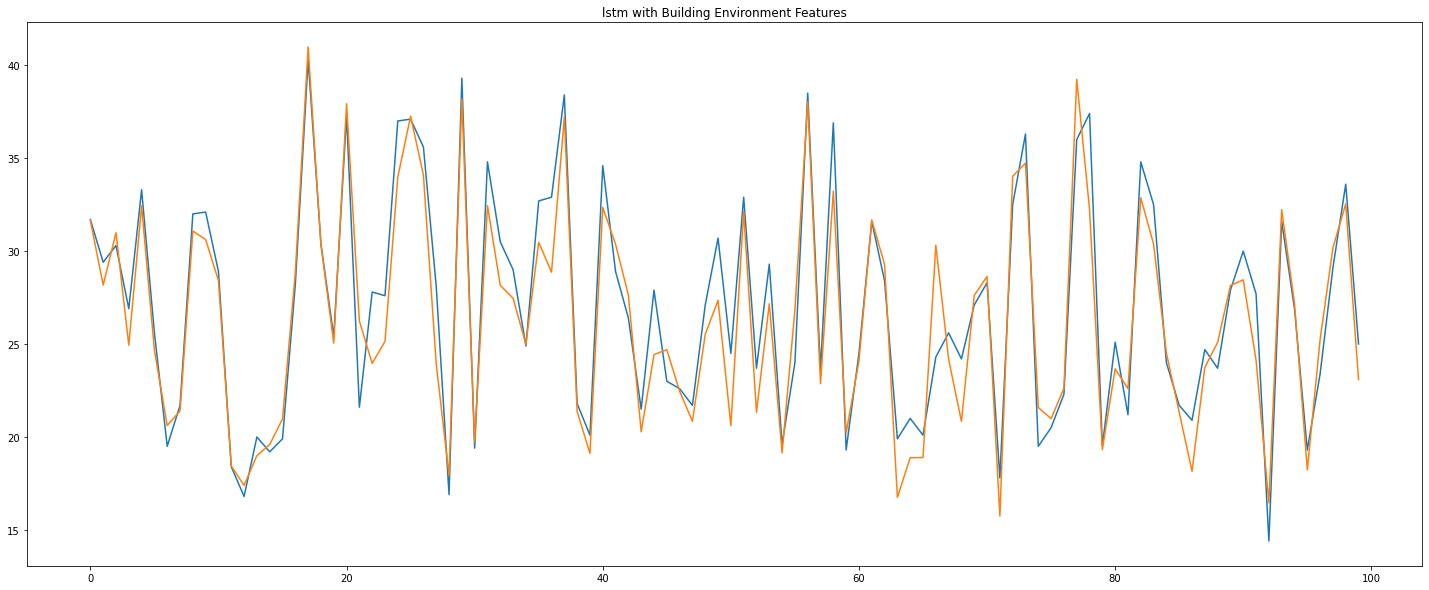

In [55]:
y_test_reind = y_test.reset_index()
y_pred = model.predict(X_test)
y_pred = y_pred.reshape(1,-1)[0]
test_result=y_test_reind
test_result['predict']=y_pred
fig = plt.figure(figsize=(25, 10))
plt.title("lstm with Building Environment Features")
plt.plot(test_result[['OBESITY','predict']][:100])

In [56]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_result['OBESITY'], y_pred))

Mean Absolute Error (MAE): 1.6672146243382608


In [19]:
data_be = Data_x[['BE_JFood_x', 'BE_Restaurant', 'BE_doctors', 'BE_pharmacy',
       'BE_gym', 'BE_attraction', 'BE_TreeD', 'BE_LandMIX', 'BE_nodeD',
       'BE_JFood_y', 'BE_HFood', 'BE_WalkVSDrive', 'BE_Transit', 'BE_Park']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_be, Data_y, test_size = 0.3, random_state = 123) 
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train_1, columns = X_train.columns)
X_test = pd.DataFrame(X_test_1, columns = X_test.columns)

In [21]:
rfr = RandomForestRegressor(n_estimators=500,max_depth=8,random_state = 123)
rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, n_estimators=500, random_state=123)

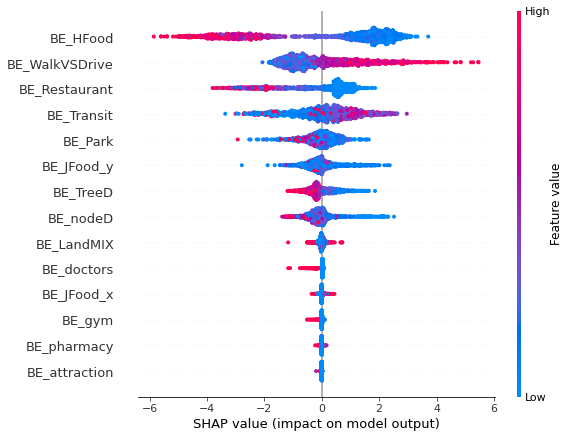

In [22]:
shap_values = shap.TreeExplainer(rfr).shap_values(X_train)
shap.summary_plot(shap_values, X_train)